In [214]:
import pandas as pd

# read in data/datathon_data_encoded.csv for training
data = pd.read_csv('data/datathon_data_freq_encoded.csv')
data.shape

(533009, 10)

In [215]:
# number of rows with label 1
data[data['label'] == 1].shape

(100, 10)

In [217]:
# drop BLNR (unique id) column
data = data.drop(columns=['BELNR'])

In [227]:
# drop numerical columns
data = data.drop(columns=['WRBTR'])
data = data.drop(columns=['DMBTR'])

In [228]:
# train test split
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Decision Tree

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106582
           1       1.00      1.00      1.00        20

    accuracy                           1.00    106602
   macro avg       1.00      1.00      1.00    106602
weighted avg       1.00      1.00      1.00    106602

  feature  importance
2   KTOSL    0.692305
3   PRCTR    0.307676
0   WAERS    0.000019
1   BUKRS    0.000000
4   BSCHL    0.000000
5   HKONT    0.000000


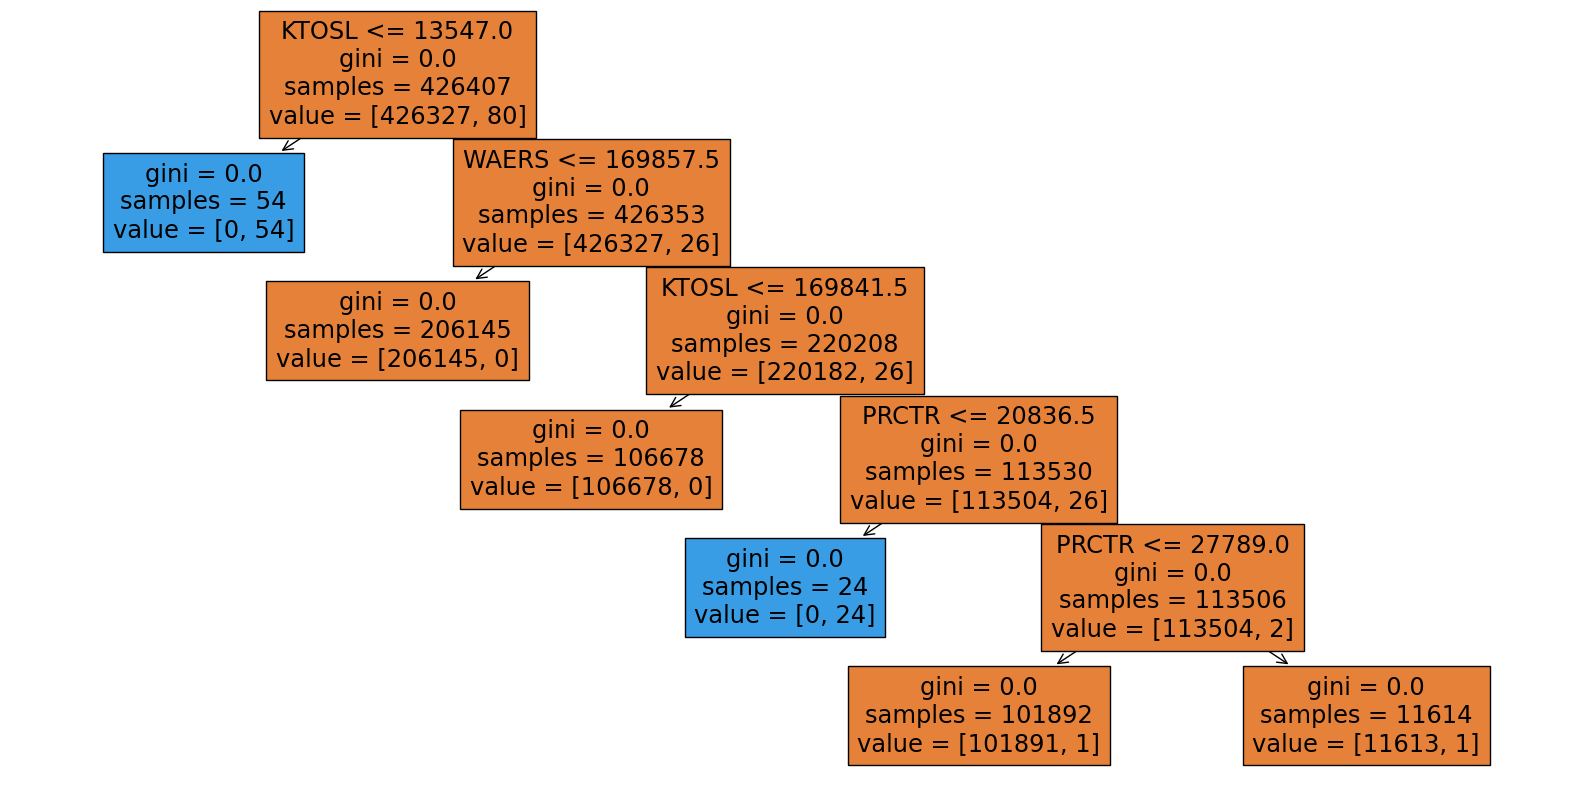

In [230]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = DecisionTreeClassifier(max_features='sqrt', max_depth=5)
clf.fit(X_train, y_train)

# predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# show feature importance
importances = clf.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)
print(importances_df)

# plot tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [188]:
# print all test data where label is 1
y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index()
y_test_df['predicted'] = y_pred
y_test_df['correct'] = y_test_df['label'] == y_test_df['predicted']
# add feature columns
X_test_df = X_test.reset_index()
y_test_df = y_test_df.drop(columns=['index'])
y_test_df = pd.concat([X_test_df, y_test_df], axis=1)
print(y_test_df[y_test_df['label'] == 1])

        index   WAERS  BUKRS   KTOSL  PRCTR   BSCHL   HKONT  label  predicted  \
293    213085  275331  27429  275105  27588  367347  330273      1          0   
13026  507568  275331  27248  275105   2881  367347  330273      1          1   
35083   34058  275331  27248  275105   2838  367347  330273      1          1   
43271  462582  275331  27248  275105  14970  367347  330273      1          0   

       correct  
293      False  
13026     True  
35083     True  
43271    False  


In [213]:
# save model
import joblib
joblib.dump(clf, 'models/decision_tree_onlycat_strat_depth5.joblib')

['models/decision_tree_onlycat_strat_depth5.joblib']

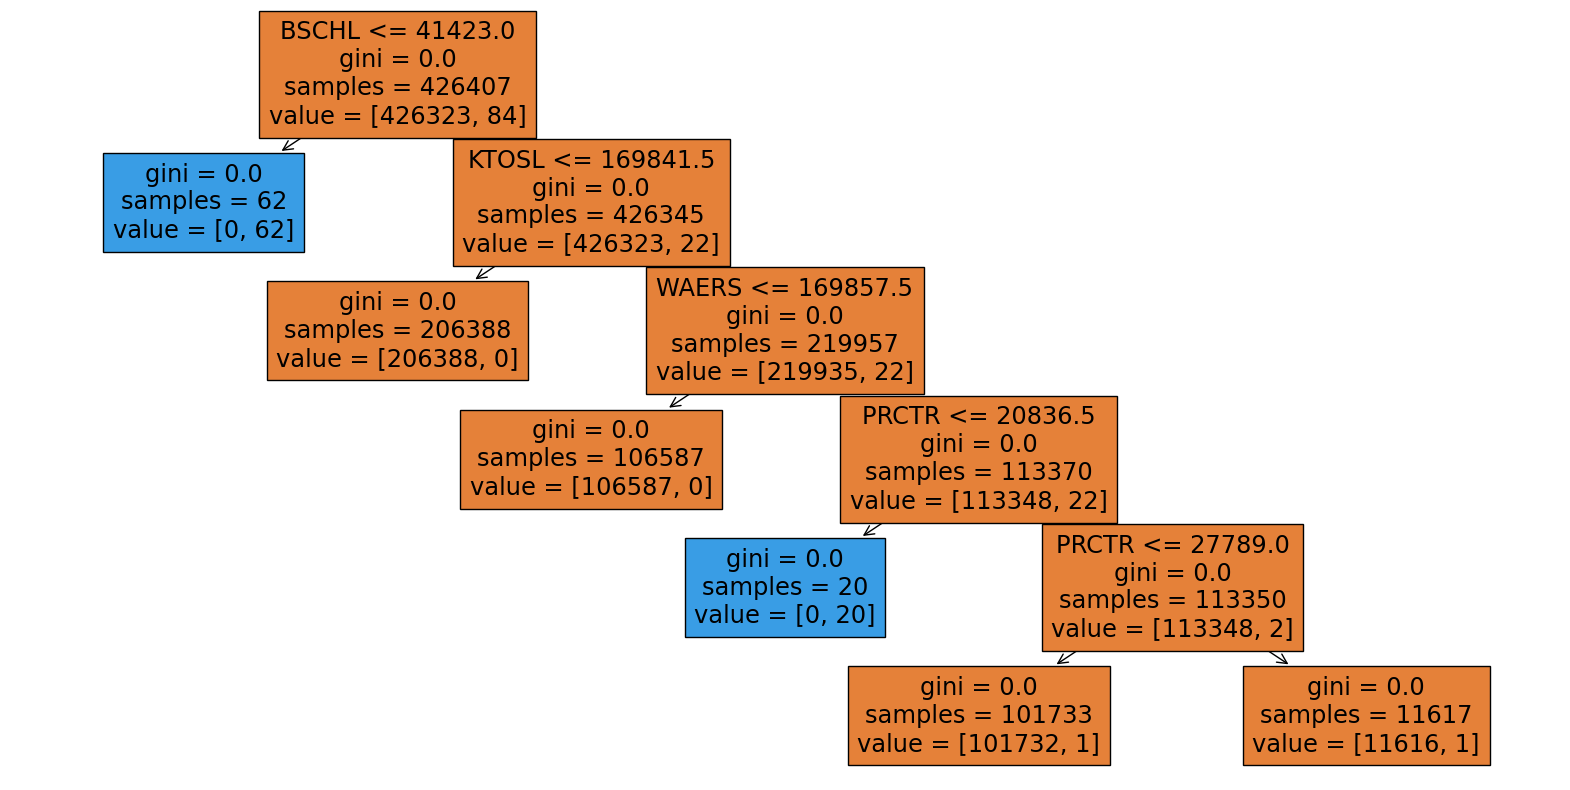

In [232]:
# Load the saved model
clf_loaded = joblib.load("models/decision_tree2.joblib")

# plot tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf_loaded, filled=True, feature_names=X.columns)
plt.show()